In [1]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.geometry import Point


In [2]:
ds = xr.open_dataset('/home/gabriel/Downloads/archive(2)/precip.mon.total.v7.nc')
precip = ds['precip'].mean(dim='time')  # Averaging over the time dimension
lat = ds['lat'].values
lon = ds['lon'].values


In [3]:
precip_flat = precip.values.flatten()
coords = [Point(lon, lat) for lon in ds['lon'].values for lat in ds['lat'].values]
gdf_precip = gpd.GeoDataFrame({'precipitation': precip_flat}, geometry=coords, crs='EPSG:4326')


In [4]:
gdf_brazil = gpd.read_file('/home/gabriel/Downloads/archive(3)/BRA_adm1.shp')


In [6]:
gdf_joined = gpd.sjoin(gdf_precip, gdf_brazil, how='inner', predicate='intersects')


In [10]:
precip_by_state = gdf_joined.groupby('NAME_1').mean().reset_index()


In [8]:
print(gdf_joined.columns)

Index(['precipitation', 'geometry', 'index_right', 'ID_0', 'ISO', 'NAME_0',
       'ID_1', 'NAME_1', 'HASC_1', 'CCN_1', 'CCA_1', 'TYPE_1', 'ENGTYPE_1',
       'NL_NAME_1', 'VARNAME_1'],
      dtype='object')


ValueError: aspect must be finite and positive 

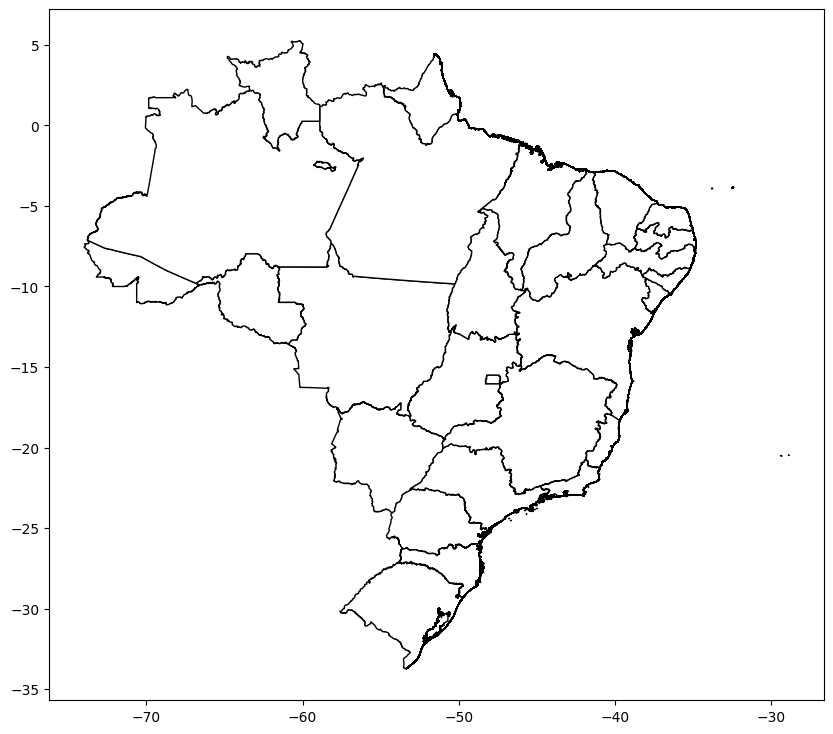

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_brazil.plot(ax=ax, color='white', edgecolor='black')
gdf_joined.plot(column='precipitation', ax=ax, legend=True)
plt.show()